In [1]:
import matplotlib.pyplot as plt
import imageio
from skimage import io, feature, color, transform, filters
import numpy as np
from scipy import ndimage as ndi
from scipy.ndimage import maximum_filter, label, find_objects
from skimage.feature import peak_local_max
from skimage import img_as_float
import cv2
from skimage.transform import hough_line, hough_line_peaks

C:\Users\polyx\AppData\Local\Temp\ipykernel_14040\673146973.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.tiff')


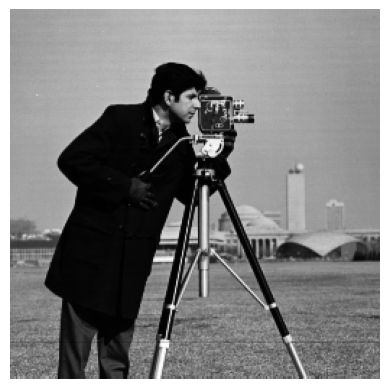

In [2]:
image = imageio.imread('cameraman.tiff')

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  
plt.show()

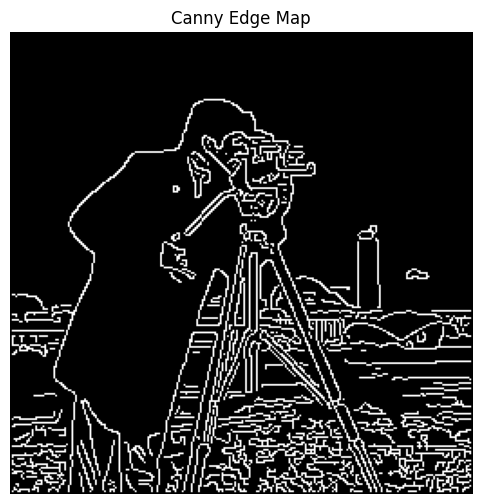

In [3]:
# Canny edge map

edges = feature.canny(image)

plt.figure(figsize=(12, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Map')
plt.axis('off')

plt.show()

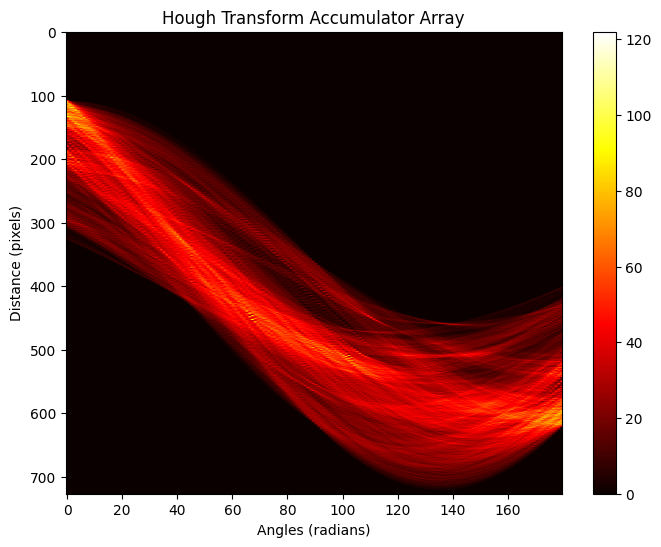

In [4]:
# Hough transform accumulator

hough_space, theta, p = transform.hough_line(edges)

plt.figure(figsize=(8, 6))
plt.imshow(hough_space, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('Hough Transform Accumulator Array')
plt.xlabel('Angles (radians)')
plt.ylabel('Distance (pixels)')
plt.show()

Top 5 coordinates:
(134, 0)
(447, 67)
(509, 102)
(511, 101)
(342, 45)


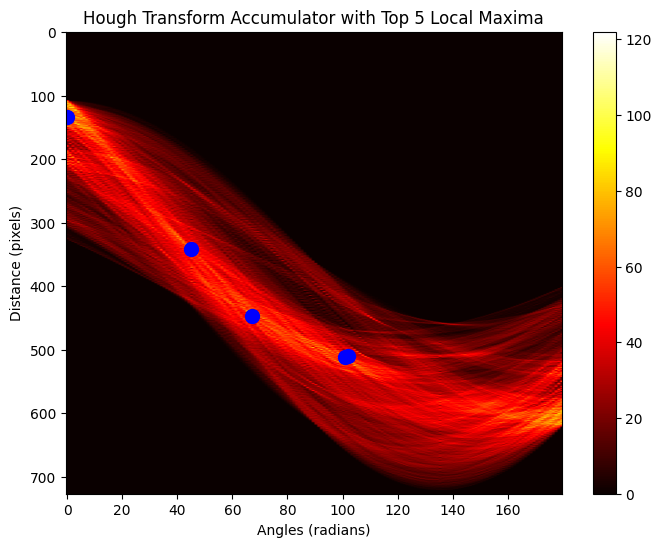

In [5]:
threshold = 0.5 * np.max(hough_space) # max 50% of the hough space
hough_thresholded = hough_space * (hough_space > threshold)

sorted_indices_flat = np.argsort(hough_thresholded.flatten())[::-1] 

# Select the top 5 indices
top_5_indices_flat = sorted_indices_flat[:5]

# Convert flat indices back to 2D coordinates (assuming hough_thresholded is 2D)
top_5_coordinates = np.unravel_index(top_5_indices_flat, hough_thresholded.shape)

# Print the top 5 coordinates
print("Top 5 coordinates:")
for coord in zip(*top_5_coordinates):
    print(coord)


plt.figure(figsize=(8, 6))
plt.imshow(hough_space, cmap='hot', aspect='auto')
plt.colorbar()
plt.title('Hough Transform Accumulator with Top 5 Local Maxima')

if len(top_5_coordinates) == 2:
    for y, x in zip(top_5_coordinates[0], top_5_coordinates[1]):  
        plt.plot(x, y, 'bo', markersize=10, label='Top 5 maxima') 
        
# Plot settings
plt.xlabel('Angles (radians)')
plt.ylabel('Distance (pixels)')
plt.show()

In [6]:
def myhoughline(image, p, theta):

    theta = np.deg2rad(theta)

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    x_0 = cos_theta * p
    y_0 = sin_theta * p
    
    # Calculate the slope of the line
    if abs(theta) != 0:
        m = -np.tan(theta) 
    else:
        m = np.inf  # Vertical line case

    height, width = image.shape[:2]

    # If the line is vertical 
    if np.isinf(m):
        x1, y1 = int(p), 0  # Line is vertical, passing through x = p
        x2, y2 = int(p), height 
    else:
        x1, y1 = 0, int(y_0 + m * (-x_0))  # Point at the left boundary (x = 0)
        x2, y2 = width, int(y_0 + m * (width - x_0))  # Point at the right boundary (x = width)

    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    # Draw the line on the image
    line_image = image.copy()
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return line_image



    

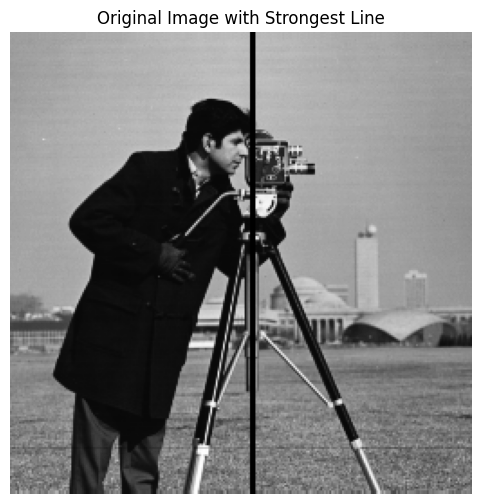

In [7]:
top_p = top_5_coordinates[0][0]
top_theta = top_5_coordinates[1][0]

line_image = myhoughline(image, top_p, top_theta)

plt.figure(figsize=(8, 6))
plt.imshow(line_image, cmap='gray')
plt.title('Original Image with Strongest Line')
plt.axis('off')
plt.show()